In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_csv('/USA_cars_datasets.csv', sep=",")

In [3]:
for col in data.columns:
  temp_null_count = data[data[col].isnull()].shape[0]
  print('{} - {}'.format(col, temp_null_count))

Unnamed: 0 - 0
price - 0
brand - 0
model - 0
year - 0
title_status - 0
mileage - 0
color - 0
vin - 0
lot - 0
state - 0
country - 0
condition - 0


In [4]:
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [5]:
data.shape

(2499, 13)

In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2499


In [7]:
data.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [8]:
data.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [9]:
data.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [10]:
data['price'].unique()

array([ 6300,  2899,  5350, 25000, 27700,  5700,  7300, 13350, 14600,
        5250, 10400, 12920, 31900,  5430, 20700, 12710,  5200, 16500,
        5210, 38100, 12520, 15000,  6180, 20800, 11900, 21500, 12000,
        4190, 13000, 18500, 29800,  5330, 16600, 19200,  7320,  7000,
       30500,  6330, 55000, 16200, 19000,  5580, 54000, 16000, 27000,
        7760, 19600, 20000, 18100, 23000, 13490, 17800,  6650, 29100,
       21100, 18600,  4340, 19300, 12780, 15800, 29400,  4430, 19400,
       15900, 26400,  4140, 18300, 17900,  4640, 24000, 13200, 18000,
       14900, 11500,  9110,  7350, 24500,  9300, 39800, 53500, 15110,
       34000, 26502,  5990, 13600, 23605, 10780, 13800, 25201,  7070,
        8700, 18003,  8530, 23100, 17000, 34002,  6980, 20802,  9200,
       26500, 24802, 28500, 47500, 23500, 23505, 10940, 32100, 53000,
        6830, 26414,  4160, 19405,  5690, 25900, 24005,  5090, 19500,
       32012,  6800,  4260,     0, 31802,  7210, 28402, 33300,  6700,
        6440, 19900,

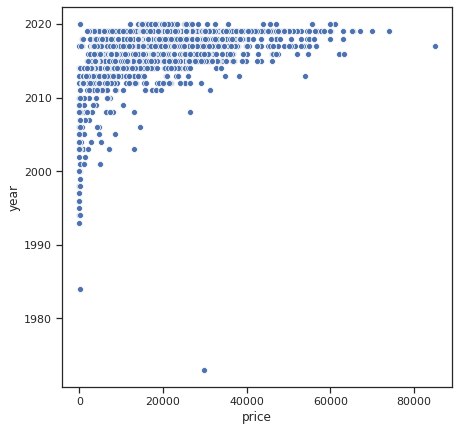

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(ax=ax, x='price', y='year', data=data)

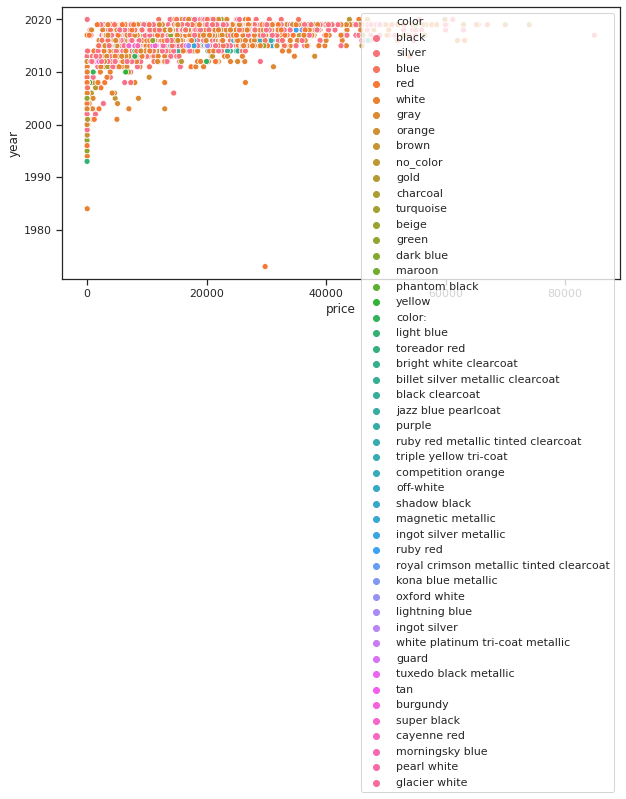

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='year', hue = 'color', data=data)

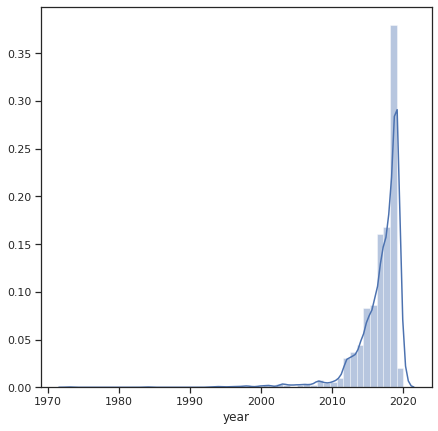

In [16]:
plt.figure(figsize= (7,7))
sns.distplot(data['year'])

<Figure size 504x504 with 0 Axes>

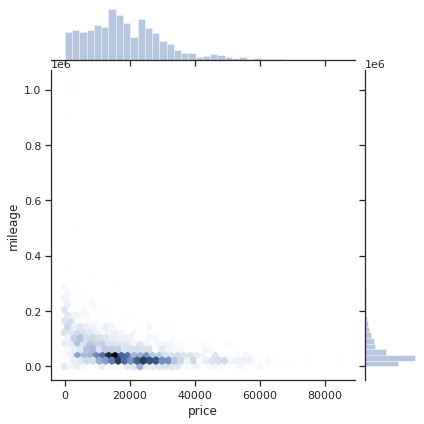

In [28]:
plt.figure(figsize=(7,7))
sns.jointplot(x='price', y='mileage', data=data, kind="hex")

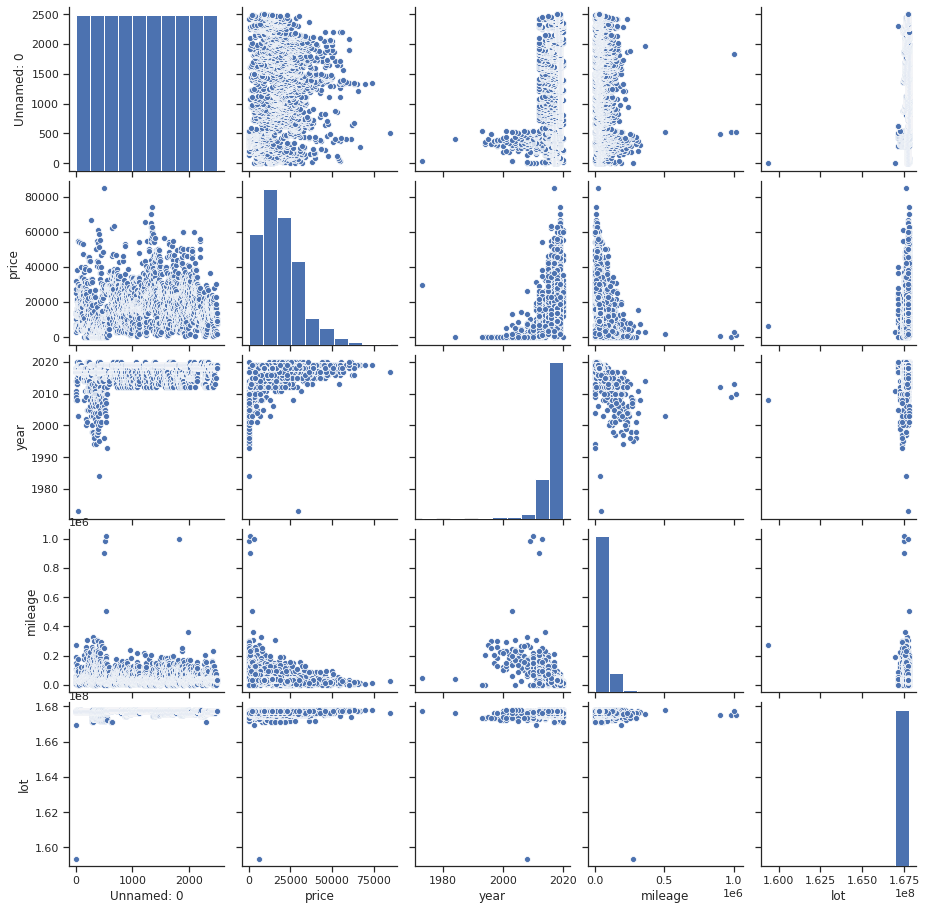

In [27]:
sns.pairplot(data)

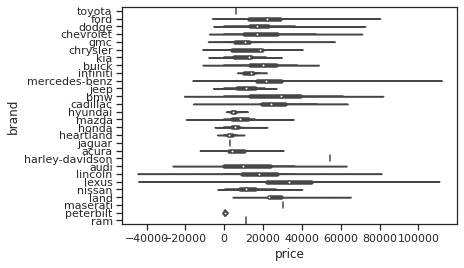

In [29]:
sns.violinplot(x='price', y='brand', data=data)

In [30]:
data.corr()

,Unnamed: 0,price,year,mileage,lot
Unnamed: 0,1.000000,0.098417,0.244921,-0.129258,0.012577
price,0.098417,1.000000,0.418274,-0.400838,0.159369
year,0.244921,0.418274,1.000000,-0.594686,0.164582
mileage,-0.129258,-0.400838,-0.594686,1.000000,-0.130475
lot,0.012577,0.159369,0.164582,-0.130475,1.000000


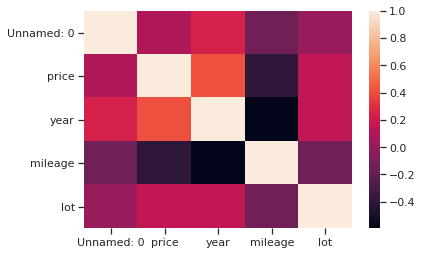

In [31]:
sns.heatmap(data.corr())

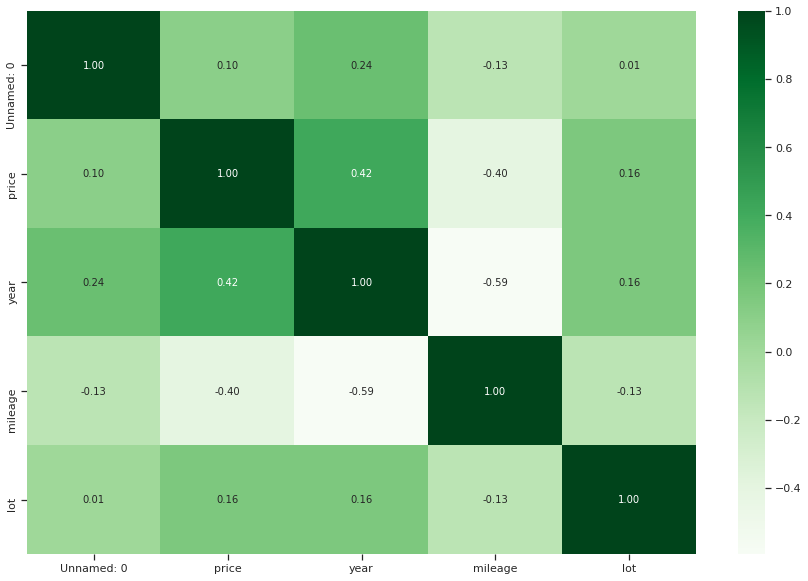

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='Greens', annot=True, fmt='.2f')

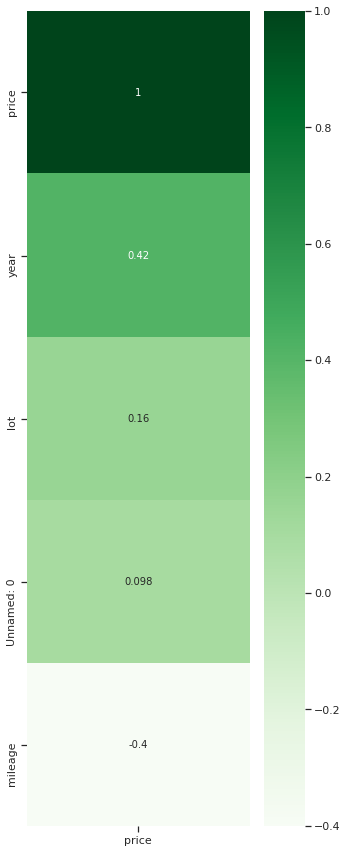

In [36]:
plt.figure(figsize=(5,15))
sns.heatmap(data.corr()[['price']].sort_values(by=['price'],ascending=False), cmap='Greens', annot=True);

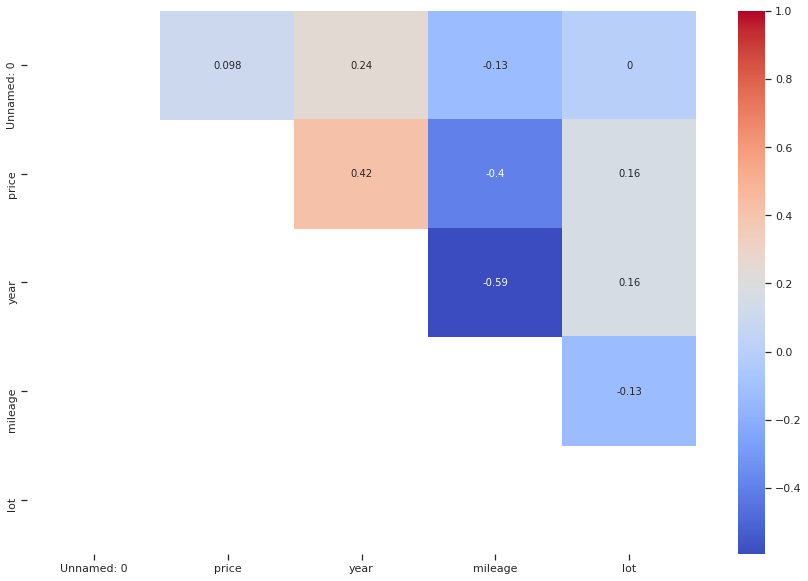

In [45]:
new_corr = data.corr()
new_corr[np.abs(new_corr)<.025] = 0
plt.figure(figsize=(15,10))
mask = np.zeros_like(new_corr,dtype = np.bool)
mask[np.tril_indices_from(mask)]=True
sns.heatmap(new_corr, mask = mask, cmap = 'coolwarm', annot = True);